In [ ]:
import librosa
import wave
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

In [ ]:
# sr= None 하지 않으면 sr= 22100으로 고정해서 나옴
# 여기서 1KHz sine wave 사용 24 bit sample
y, sr = librosa.load("/content/drive/MyDrive/1khz sinewace.wav", sr=None)

In [ ]:
print(sr)

16000


In [ ]:
print(y)

[-0.01511129 -0.01093547 -0.00556946 ...  0.01189677  0.00802612
  0.002889  ]


## TIME domain

Text(0, 0.5, 'Amplitude')

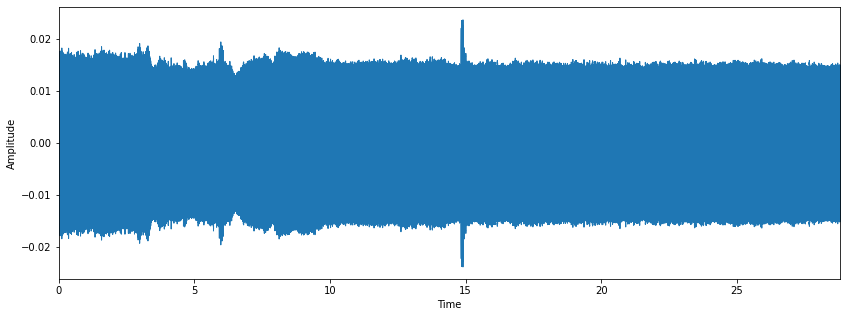

In [ ]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(y,sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")

## frequency domain

In [ ]:
#1차 fourier transform
X = np.fft.fft(y)
print(X.shape)

(460800,)


In [ ]:
# start, stop, 쪼개는 개수
f = np.linspace(0, sr, len(X))
print(f.shape)

(460800,)


In [ ]:
# draw frequency domain
plt

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


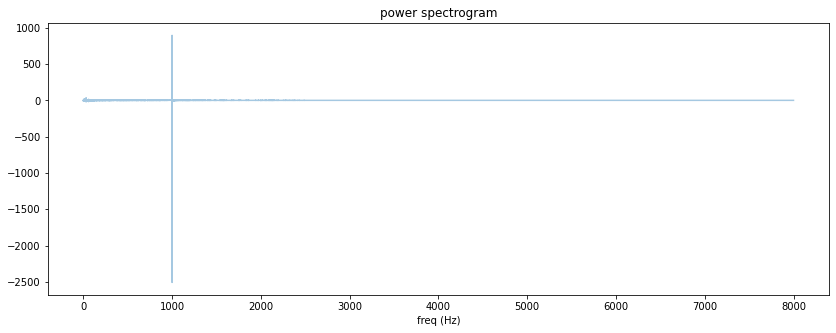

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(f[:230400], X[:230400], alpha= 0.4)
plt.title('power spectrogram')
plt.xlabel("freq (Hz)")
plt.show()

## STFT and power spectrogram

In [ ]:
# short time fourier transform
D = librosa.stft(y)

In [ ]:
# 허수부 제거
S = np.abs((D))

In [ ]:
S

array([[1.1573213e-01, 7.2560720e-02, 7.3914826e-02, ..., 3.0593123e-02,
        7.5836875e-02, 6.4665927e-03],
       [6.0016040e-02, 6.3557610e-02, 1.0001479e-01, ..., 1.6445662e-01,
        1.0164251e-01, 4.5657605e-02],
       [2.2741916e-02, 6.1472211e-02, 8.4039599e-02, ..., 1.7168419e-01,
        1.1265632e-02, 1.0759693e-01],
       ...,
       [1.3010688e-03, 7.6454156e-04, 9.3650313e-05, ..., 2.3377139e-05,
        1.4109516e-03, 2.8154461e-03],
       [1.0550126e-03, 6.0549710e-04, 1.6589592e-04, ..., 8.1989136e-05,
        1.4473143e-03, 2.8216029e-03],
       [7.9784938e-04, 2.5165372e-04, 1.3556323e-04, ..., 1.2358527e-04,
        1.3565901e-03, 2.7954364e-03]], dtype=float32)

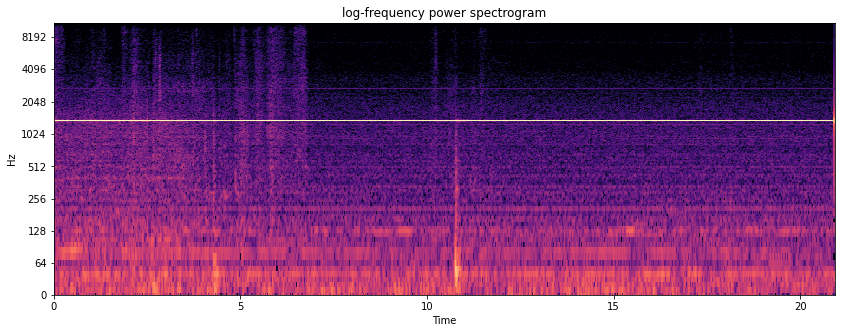

In [ ]:
# plot 그리기 : power spectrogram with frequency and time domain
# amplitude_to_db : amplitude -> DB
plt.figure(figsize = (14,5))
librosa.display.specshow(librosa.amplitude_to_db(S, ref= np.max),
                                y_axis='log',x_axis='time')
plt.title('log-frequency power spectrogram')
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Time")
plt.show()

## Mel-spectrogram

In [ ]:
filter_banks = librosa.filters.mel(n_fft = 2048, sr= sr, n_mels = 10)

In [ ]:
filter_banks.shape

(10, 1025)

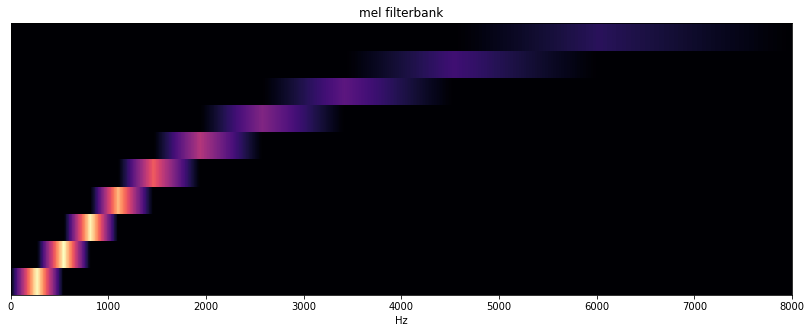

In [ ]:
# plot 그리기 : Mel filter bank
# amplitude_to_db : amplitude -> DB
plt.figure(figsize = (14,5))
librosa.display.specshow(filter_banks, sr= sr, x_axis='linear')
plt.title('mel filterbank')
plt.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

In [ ]:
mel = librosa.feature.melspectrogram(y, sr, n_fft= 2048, hop_length = 512, n_mels = 10 )

In [ ]:
mel.shape

(10, 901)

In [ ]:
mel_db = librosa.power_to_db(mel, ref = np.max)

In [ ]:
mel_db.shape

(10, 901)

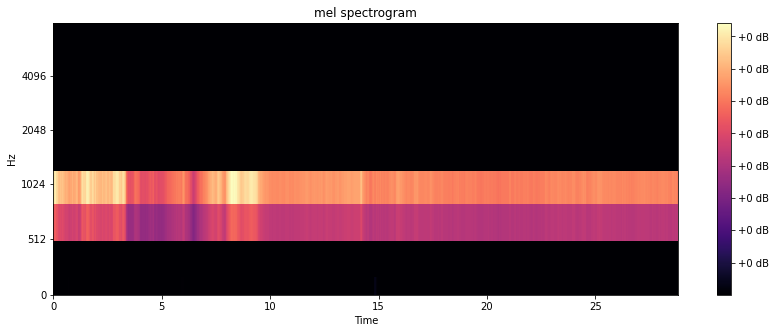

In [ ]:
# plot 그리기 : melspectrogram
plt.figure(figsize = (14,5))
librosa.display.specshow(mel, y_axis='mel',x_axis='time', sr= sr)
plt.title('mel spectrogram')
plt.colorbar(format="%+2.0f dB")
plt.show()

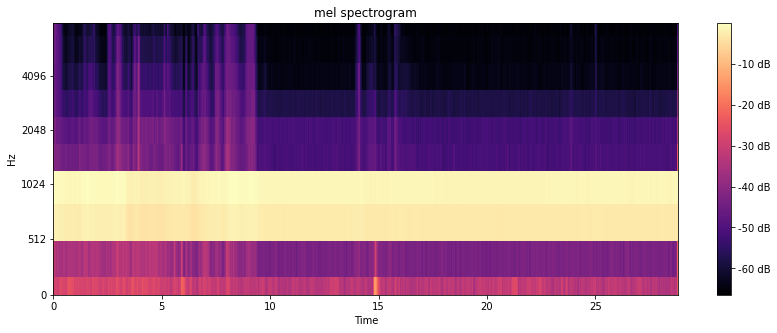

In [ ]:
# plot 그리기 : log-mel spectrogram
plt.figure(figsize = (14,5))
librosa.display.specshow(mel_db, y_axis='mel',x_axis='time', sr= sr)
plt.title('mel spectrogram')
plt.colorbar(format="%+2.0f dB")
plt.show()

In [ ]:
# np.log가 지원이 안되어 
# 계산에 오류가 있겠지만 데시벨 되어있는 데이터를 데시벨 공식에 대입 (로그 두번한 효과)
log_log_mel_db = librosa.power_to_db(mel_db)

In [ ]:
log_log_mel_db.shape

(10, 901)

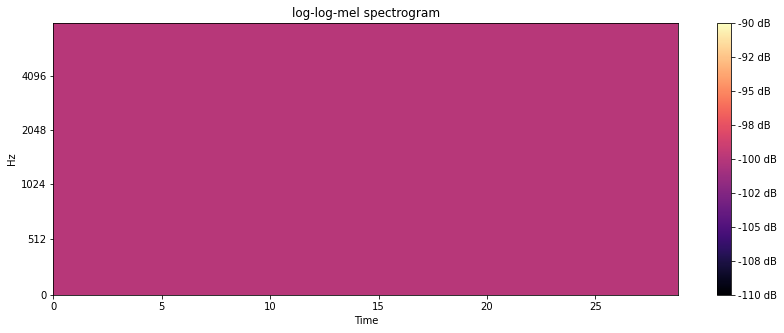

In [ ]:
# plot 그리기 : log-log-melspectrogram
plt.figure(figsize = (14,5))
librosa.display.specshow(log_log_mel_db, y_axis='mel',x_axis='time', sr= sr)
plt.title('log-log-mel spectrogram')
plt.colorbar(format="%+2.0f dB")
plt.show()

## MFCC

In [ ]:
mfccs = librosa.feature.mfcc(y, n_mfcc = 13, sr=sr)

In [ ]:
mfccs.shape

(13, 901)

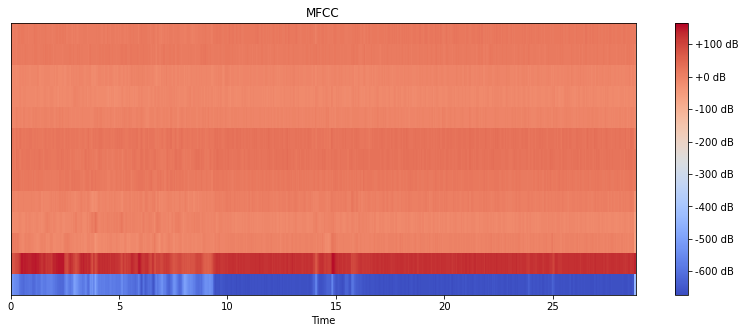

In [ ]:
# plot 그리기 : MFCC
plt.figure(figsize = (14,5))
librosa.display.specshow(mfccs, x_axis = 'time', sr= sr)
plt.title('MFCC')
plt.colorbar(format="%+2.0f dB")
plt.show()

In [ ]:
# first and second MFCC derivative
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfcc = librosa.feature.delta(mfccs, order = 2)

In [ ]:
delta_mfccs.shape

(13, 901)

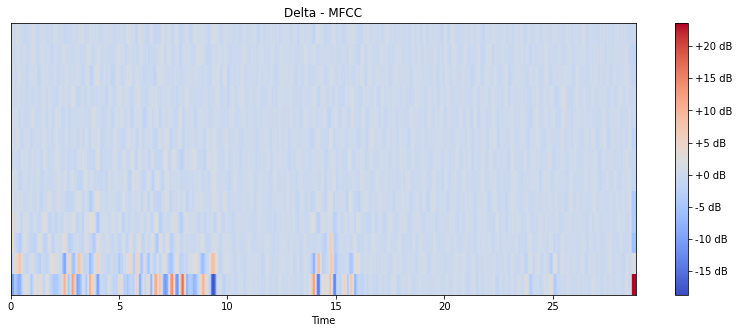

In [ ]:
# plot 그리기 : delta MFCC
plt.figure(figsize = (14,5))
librosa.display.specshow(delta_mfccs, x_axis = 'time', sr= sr)
plt.title('Delta - MFCC')
plt.colorbar(format="%+2.0f dB")
plt.show()

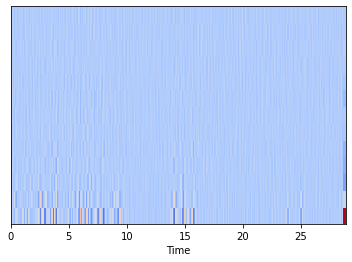

In [ ]:
# plot 그리기 : delta MFCC
plt.figure(figsize = (14,5))
librosa.display.specshow(delta2_mfcc, x_axis = 'time', sr= sr)
plt.title('Delta2 - MFCC')
plt.colorbar(format="%+2.0f dB")
plt.show()

In [ ]:
mfcc_fea = np.concatenate((mfccs, delta_mfccs, delta2_mfcc), axis = 0)

In [ ]:
mfcc_fea.shape

(39, 901)